In [69]:
import imageio
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [127]:
liz_pic = imageio.imread('img/E98A6671.jpg')
liz_pic = rgb2gray(liz_pic)

In [128]:
image_shape = liz_pic.shape

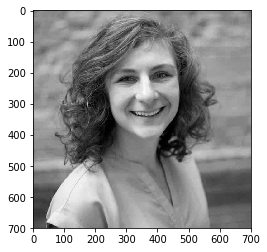

In [129]:
plt.imshow(liz_pic, cmap=plt.cm.gray)

In [130]:
# Center the columns
liz_pic_centered = liz_pic - liz_pic.mean(axis=0)

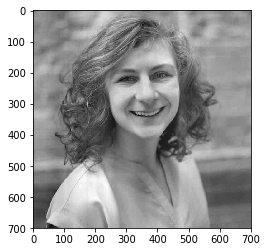

In [131]:
plt.imshow(liz_pic_centered, cmap=plt.cm.gray)

In [148]:
N = 500
liz_pca = PCA(N).fit(liz_pic_centered)

In [149]:
eigens = liz_pca.components_
eigens.shape

(500, 700)

In [150]:
eigens_top = eigens[:,:N]
eigens_top.shape

(500, 500)

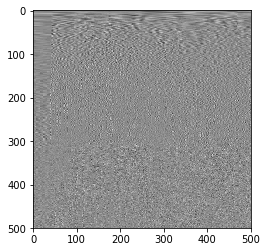

In [151]:
fig, ax = plt.subplots()
ax.imshow(eigens_top, cmap=plt.cm.gray)

ValueError: cannot reshape array of size 700 into shape (700,700)

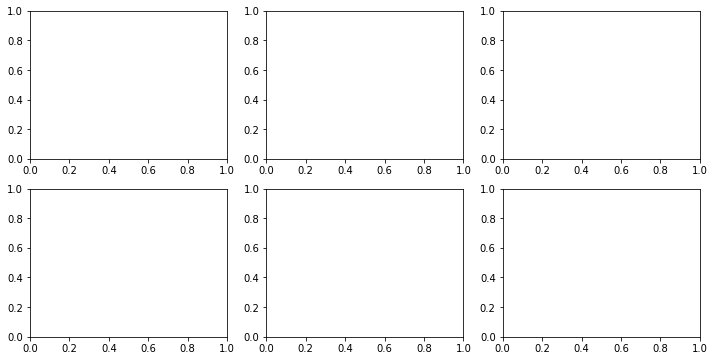

In [138]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
for ax, i in zip(axs.flatten(), range(6)):
    eigenface = liz_pca.components_[i, :].reshape(liz_pic.shape)
    ax.imshow(eigenface, cmap=plt.cm.gray)
    ax.set_title("{}'th Eigenface".format(i))
    ax.set_xticks(())
    ax.set_yticks(())
    
fig.tight_layout()

In [97]:
liz_pca.components_[i, :].shape

(700,)